In [12]:
from selenium import webdriver
import pandas as pd
import matplotlib.pyplot as plt

driver = webdriver.Chrome("C:\Program Files\chromedriver.exe")

driver.get('https://www.fifa.com/fifa-world-ranking/men?dateId=id13792')

countries = driver.find_elements_by_xpath('//span[@class="d-none d-lg-block"]')
t_points=driver.find_elements_by_xpath('//div[@class="d-flex ff-mr-16"]')
P_and_D_points=driver.find_elements_by_xpath('//td[@class="d-none d-lg-table-cell card-heading-small row_rankingTableFullCell__QBdWh"]')


#Extracting name of the countries:
countries_list = []
for p in range(len(countries)):
    countries_list.append(countries[p].text)


#Extracting total point of the countries:
total_points = []
for p in range(len(t_points)):
    total_points.append(t_points[p].text)


#Extracting previous point of the countries:
previous_points_d = []
for p in range(len(P_and_D_points)):
    previous_points_d.append(P_and_D_points[p].text)
#Delete every third element
del previous_points_d[2::3]
previous_points = previous_points_d[::2]    


#Extracting difference point of the total and previous pionts:
difference_p = []   
difference_p = previous_points_d[1::2] 

data_objects = {
    "Country":countries_list,
    "Total":total_points,
    "Previous":previous_points,
    "Difference":difference_p
}

df = pd.DataFrame(data_objects)
df


,Country,Total,Previous,Difference
0,Brazil,1841.3,1837.56,3.74
1,Belgium,1816.71,1821.92,-5.21
2,Argentina,1773.88,1770.65,3.23
3,France,1759.78,1764.85,-5.07
4,England,1728.47,1737.46,-8.99
5,Italy,1726.14,1713.86,12.28
6,Spain,1715.22,1716.93,-1.71
7,Netherlands,1694.51,1679.41,15.10
8,Portugal,1676.56,1678.65,-2.09
9,Denmark,1666.57,1665.47,1.10


In [13]:
#Creating csv file from the data
df.to_csv("FIFA_ranking.csv", index=False)

#Getting first five row
data = pd.read_csv("FIFA_ranking.csv", index_col=0, parse_dates=True)
data = data.head()
data

,Total,Previous,Difference
Country,,,
Brazil,1841.30,1837.56,3.74
Belgium,1816.71,1821.92,-5.21
Argentina,1773.88,1770.65,3.23
France,1759.78,1764.85,-5.07
England,1728.47,1737.46,-8.99


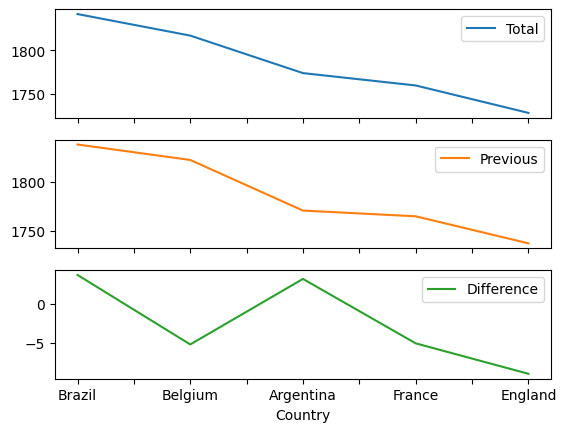

In [14]:
#Plotting
data.plot.line(subplots=True)
plt.show()
